## BIG MART DATA ANALYSIS AND PREDICTION

### Problem Statement

The data scientists at BigMart have collected sales data for 1559 products across 10 stores in different cities for the year 2013. Now each product has certain attributes that sets it apart from other products.

Supervised machine learning problem.And the target value will be Item_Outlet_Sales.

The objective is to create a model that can predict the sales per product for each store. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

### Hypothesis Generation

1. Item_Weight and Sales:
     * Hypothesis: Items with higher weights may have higher sales due to perceived value or utility.
     * Null Hypothesis: Item weight does not significantly impact sales.
     * Potential analysis: Compare the average sales for different weight categories and test for significant differences.
     

2. Item_Fat_Content and Sales:
     * Hypothesis: Items labeled as "Low Fat" may have higher sales compared to "Regular Fat" items due to increasing health            consciousness.
     * Null Hypothesis: Item fat content does not significantly affect sales.
     * Potential analysis: Analyze the average sales for different fat content categories and test for significant differences.
     

3. Item_Visibility and Sales:
     * Hypothesis: Higher visibility of items on shelves may lead to increased sales as customers are more likely to notice and        purchase them.
     * Null Hypothesis: Item visibility has no significant impact on sales.
     * Potential analysis: Investigate the correlation between item visibility and sales, considering outliers and trends.
     

4. Item_Type and Sales:
     * Hypothesis: Certain types of items (e.g., high-demand or seasonal) may have higher sales.
     * Null Hypothesis: The type of item does not significantly influence sales.
     * Potential analysis: Compare the average sales for different item types and test for significant differences.
     

5. Item_MRP and Sales:
     * Hypothesis: Items with higher maximum retail prices may have higher sales, assuming customers associate higher prices            with higher quality.
     * Null Hypothesis: Item MRP does not significantly impact sales.
     * Potential analysis: Analyze the relationship between item prices and sales using regression analysis.
     

6. Outlet_Identifier and Sales:
     * Hypothesis: Certain outlets may consistently have higher sales due to factors such as location, customer base, or                marketing strategies.
     * Null Hypothesis: The outlet identifier has no significant impact on sales.
     * Potential analysis: Compare the average sales for different outlet identifiers and test for significant differences.
     

7. Outlet_Establishment_Year and Sales:
     * Hypothesis: Newer outlets may have higher sales due to modern facilities or marketing efforts.
     * Null Hypothesis: The establishment year of the outlet does not significantly affect sales.
     * Potential analysis: Explore the relationship between outlet establishment year and sales over time.
     

8. Outlet_Size and Sales:
     * Hypothesis: Larger outlets may experience higher sales due to a larger inventory and customer base.
     * Null Hypothesis: Outlet size does not significantly influence sales.
     * Potential analysis: Compare the average sales for different outlet sizes and test for significant differences.
     

9. Outlet_Location_Type and Sales:
     * Hypothesis: Outlets located in urban areas may have higher sales due to higher foot traffic.
     * Null Hypothesis: The location type of the outlet does not significantly impact sales.
     * Potential analysis: Analyze the average sales across different outlet location types and investigate any patterns or            differences.
     
10.  Outlet_Type and Sales:
      * Hypothesis: Supermarkets or high-end grocery stores may have higher sales compared to other types of outlets.
      * Null Hypothesis: Outlet type does not significantly influence sales.
      * Potential analysis: Compare the average sales across different outlet types and evaluate statistical differences.

### Loading Packages and Data

In [2]:
import pandas as pd # linear algebra
import numpy as np # data processing

#ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns

#feature engineering
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

#train test split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


#metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2

#ML models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso # Implement and evaluate Regularized Linear Regression (Lasso or Ridge)
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection  import KFold,cross_val_score

import joblib


In [3]:
# Loading train dataset
train_data = pd.read_csv(r"C:\Users\acer\OneDrive\Desktop\Mini Project\Train.csv")

# Loading of test dataset
test_data = pd.read_csv(r"C:\Users\acer\OneDrive\Desktop\Mini Project\Test.csv")

### Data Structure and Content

In [4]:
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [5]:
# Analysing shape of train dataset
print("Train Data :") 
print(train_data.shape)

# Analysing shape of train dataset
print("\nTest Data :")
print(test_data.shape)

Train Data :
(8523, 12)

Test Data :
(5681, 11)


In [6]:
# Checking first five rows
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
# Display statistical summary for the training dataset
print("Training Data Summary:")
print(train_data.describe())

# Display statistical summary for the test dataset
print("\nTest Data Summary:")
print(test_data.describe())

Training Data Summary:
       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  

Test Data Summary:
  

In [10]:
# Checking data types of each column in the training dataset
print("Data Types of Training Dataset:")
print(train_data.dtypes)

# Checking data types of each column in the test dataset
print("\nData Types of Test Dataset:")
print(test_data.dtypes)

Data Types of Training Dataset:
Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Data Types of Test Dataset:
Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object


In [11]:
# Checking duplicates
train_data.duplicated().sum()

0

In [12]:
train_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [13]:
train_data.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}},inplace=True)
train_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

### Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process, allowing you to understand the structure, patterns, and characteristics of your dataset

In [14]:
train_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [15]:
# Display Numerical Columns name
numerical_cols = train_data.select_dtypes(include=['number']).columns

print("Numerical Columns:")
for col in numerical_cols:
    print(col)

Numerical Columns:
Item_Weight
Item_Visibility
Item_MRP
Outlet_Establishment_Year
Item_Outlet_Sales


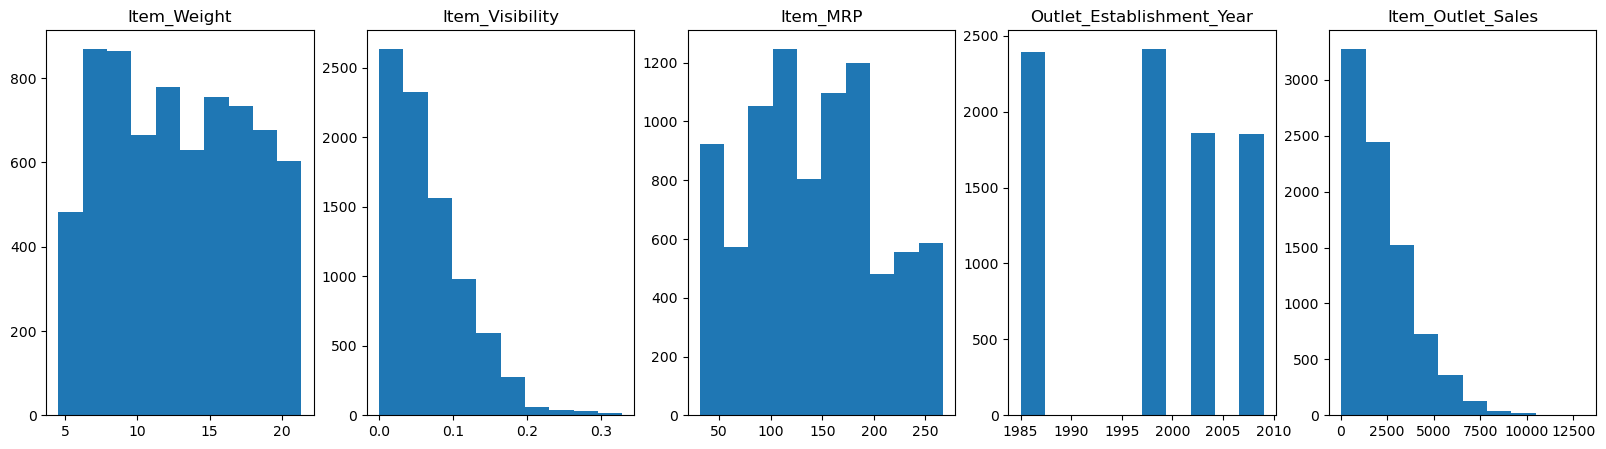

In [16]:
# Checking the distribution of the numerical Columns
fig, ax = plt.subplots(1, 5, figsize=(20, 5))

for i, col in enumerate(numerical_cols):
    ax[i].hist(train_data[col])
    ax[i].set_title(col)

* In these graph shows that the Item Visibility and Item outlet sales columns are right skewed.

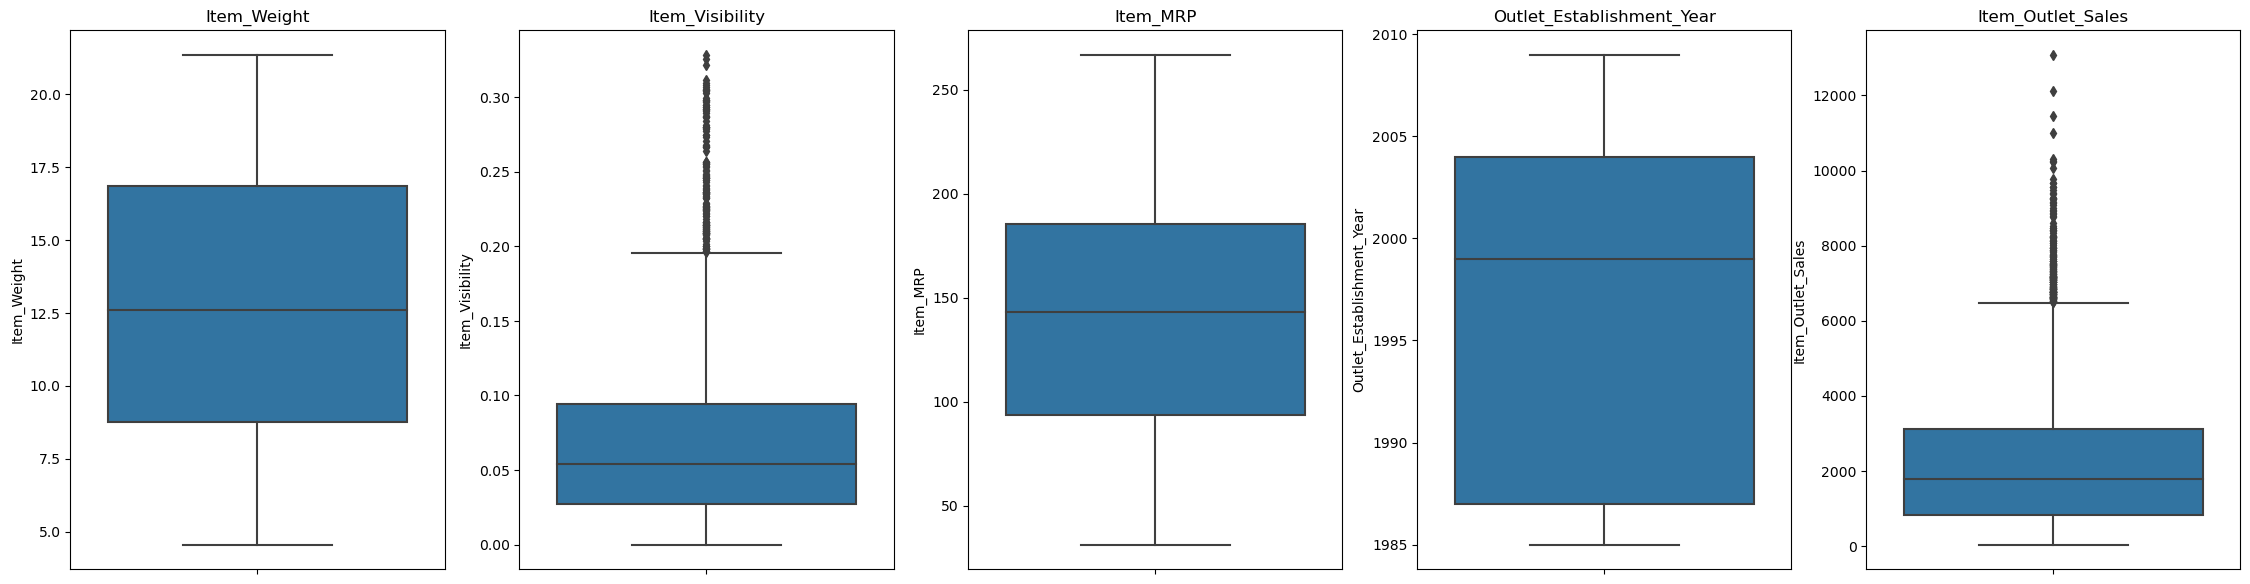

In [17]:
 # Checking for outliers in the numerical columns
fig, ax = plt.subplots(1, 5, figsize=(28, 7))

for i, col in enumerate(numerical_cols):
    sns.boxplot(data=train_data, y=col, ax=ax[i])
    ax[i].set_title(col)


* These shows that in the column Item_Visibility and Item_Outlet_Sales has outliers so we handle that

In [18]:
def remove_outliers(col):
    q1 = train_data[col].quantile(0.25)
    q3 = train_data[col].quantile(0.75)
    iqr = q3 - q1

    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 *iqr
    count_outliers = train_data[train_data[col] > upper_limit].shape[0]

    print(f'{count_outliers} outliers out of {train_data.shape[0]}. i.e; {count_outliers/train_data.shape[0]*100:.2f}% of outliers.')

    # Return the DataFrame without outliers
    return train_data[train_data[col] < upper_limit]

# Assuming df is your DataFrame
train_data = remove_outliers('Item_Visibility')
train_data = remove_outliers('Item_Outlet_Sales')

144 outliers out of 8523. i.e; 1.69% of outliers.
186 outliers out of 8379. i.e; 2.22% of outliers.


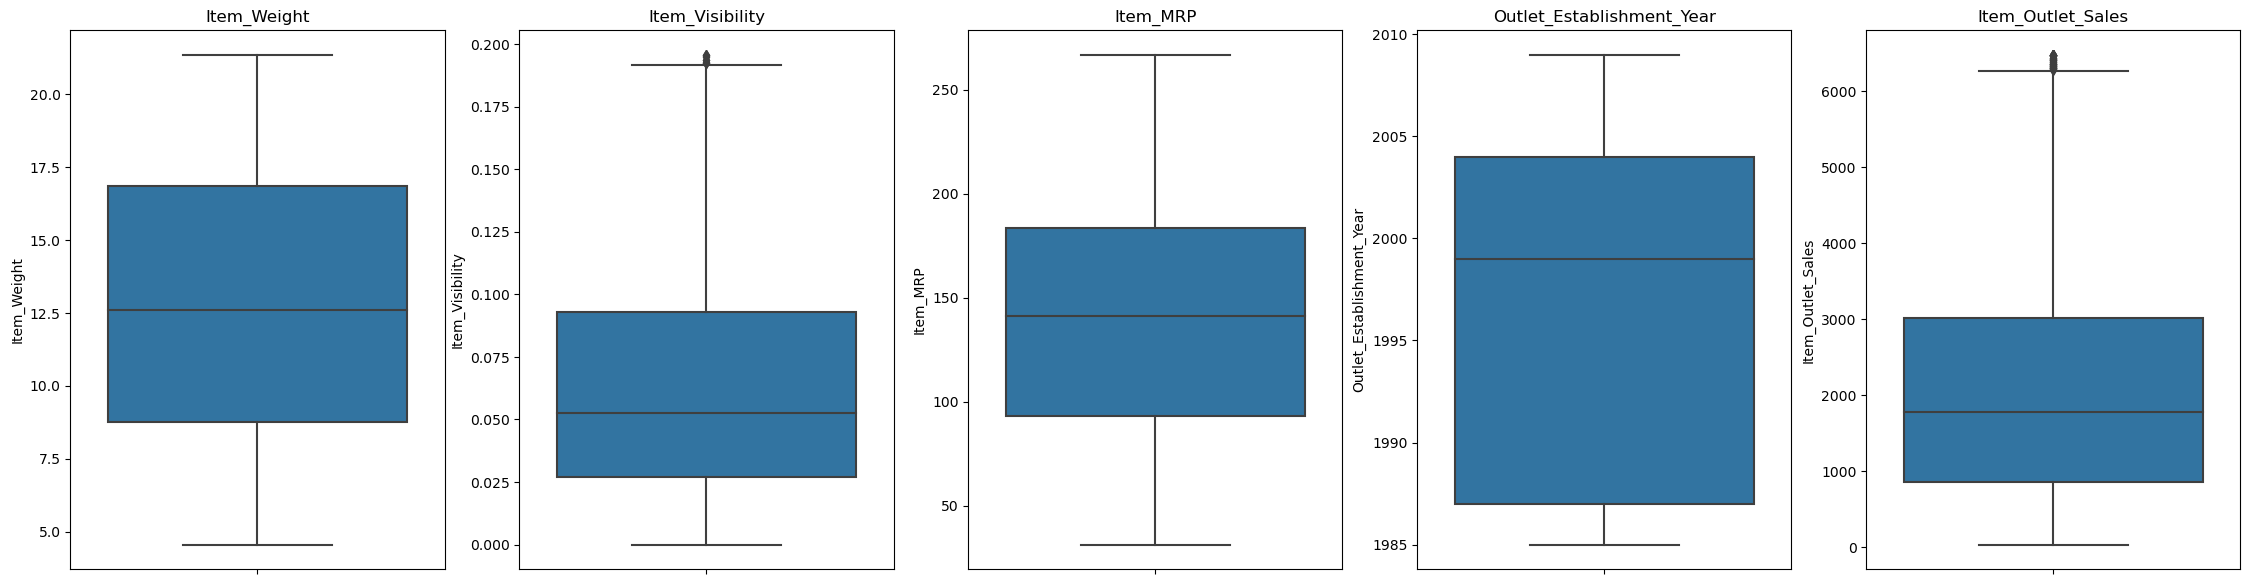

In [19]:
 # Checking for outliers in the numerical columns
fig, ax = plt.subplots(1, 5, figsize=(28, 7))

for i, col in enumerate(numerical_cols):
    sns.boxplot(data=train_data, y=col, ax=ax[i])
    ax[i].set_title(col)

c:\Users\acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


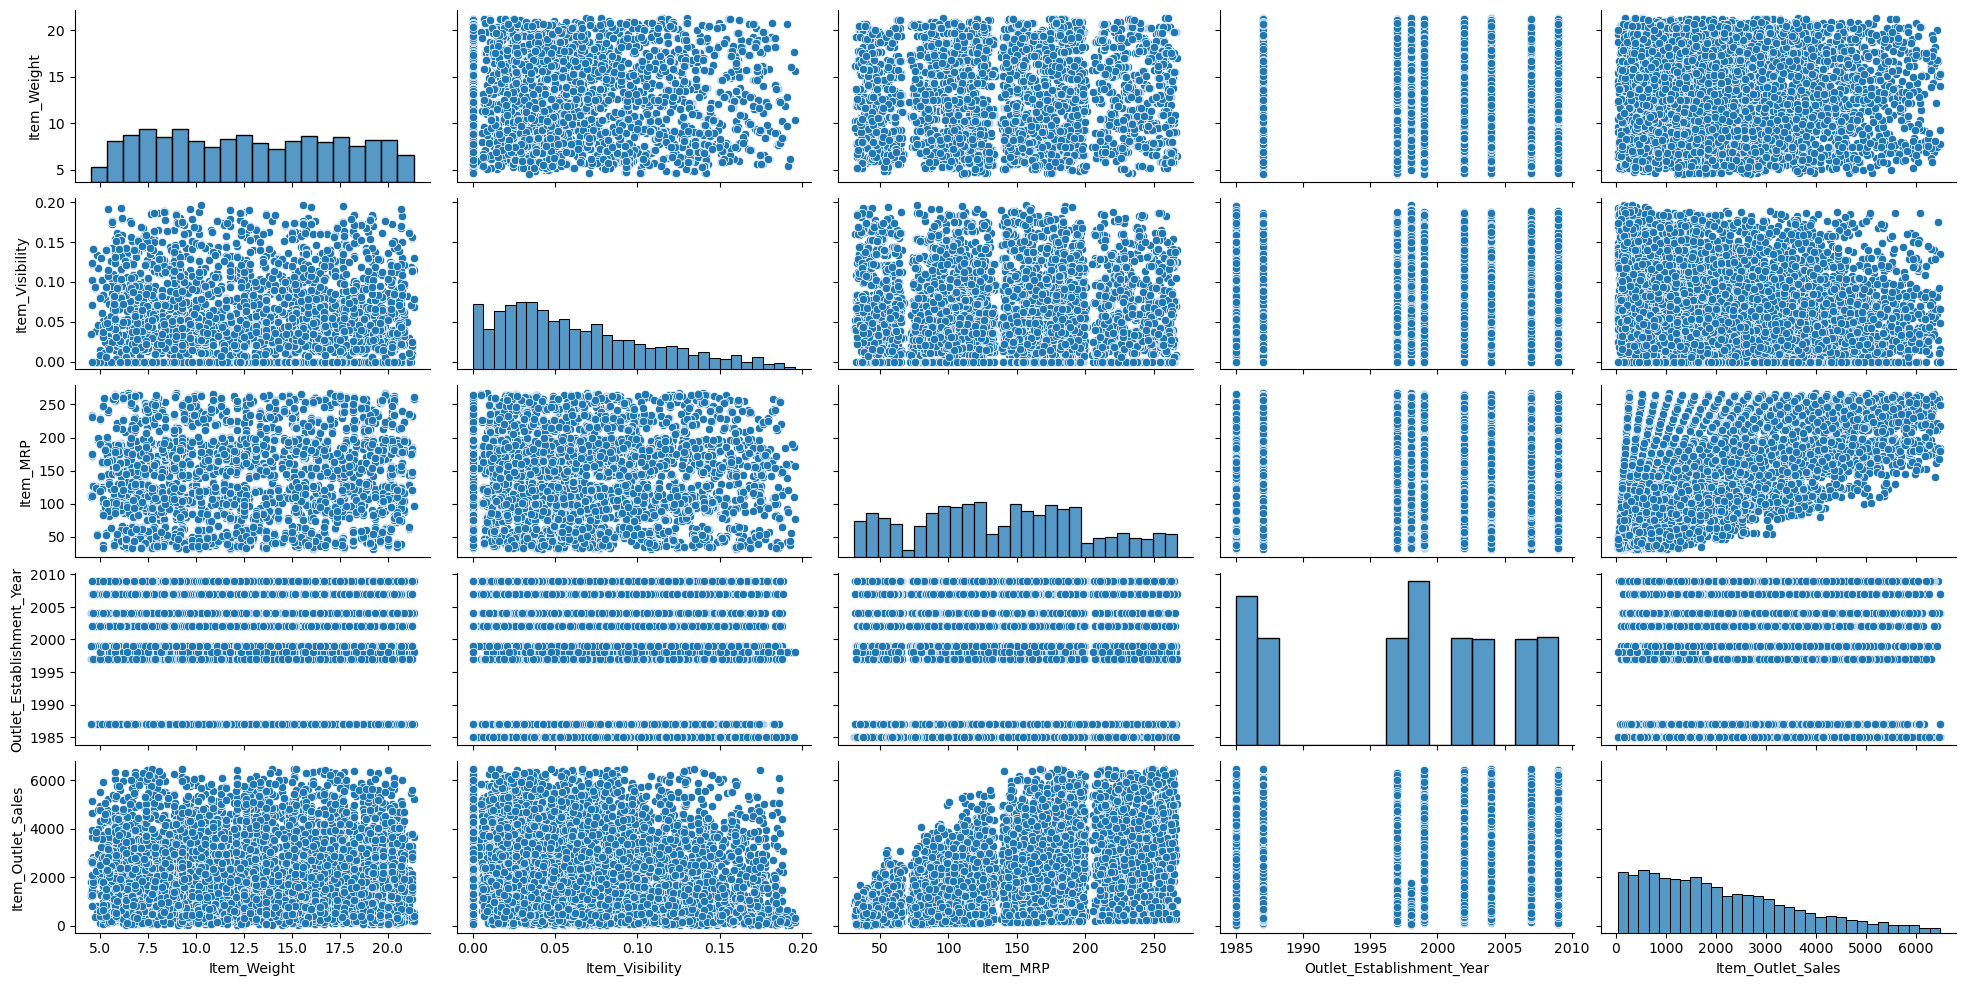

In [20]:
# Visualize data distribution and patterns
sns.pairplot(train_data, height=2,aspect=2)
plt.show()

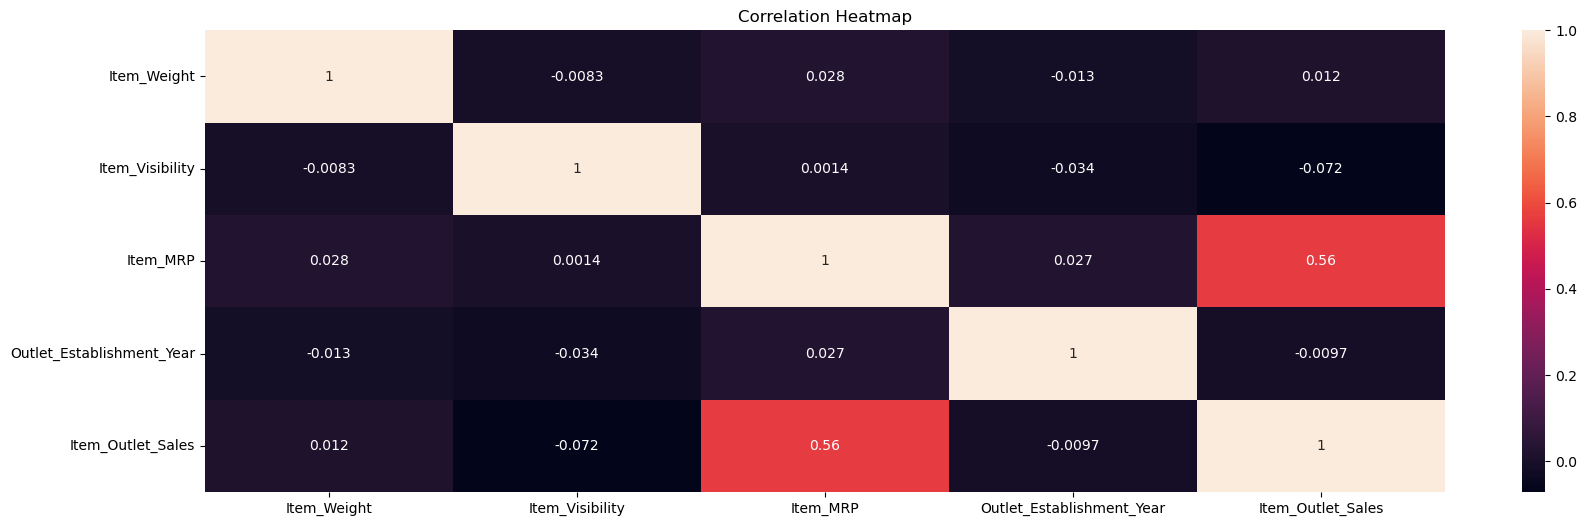

In [21]:
# This heatmap provides insights into the pairwise correlations between numerical variables
# Create a heatmap
plt.figure(figsize=(20,6))
sns.heatmap(train_data[numerical_cols].corr(),annot=True)
plt.title('Correlation Heatmap')
plt.show()

* The correlation between Item_Outlet_Sales and Item_MRP is 0.56 which shows highly positive correlation . That is when the Sales increases MRP rate also increases by perfect positive linear relationship.
 
* Item_Outlet_Sales and Item_Visibility with -0.072 which shows a very weak negative correlation between these two variables. That there is a slight tendency for items with higher visibility to have slightly lower sales and vice versa.

### Univariate Analysis

In [22]:
# Display the list of categorical columns
categorical_columns = train_data.select_dtypes(include=['object']).columns

print("Categorical Columns:")
for col in categorical_columns:
    print(col)

Categorical Columns:
Item_Identifier
Item_Fat_Content
Item_Type
Outlet_Identifier
Outlet_Size
Outlet_Location_Type
Outlet_Type


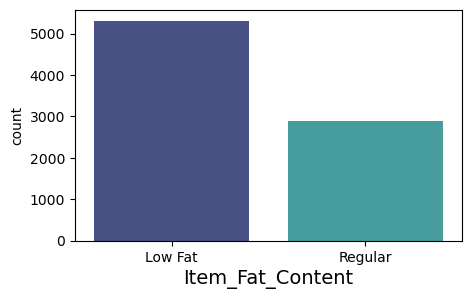

In [23]:
plt.figure(figsize=(5,3))
sns.countplot(x='Item_Fat_Content' , data=train_data ,palette='mako')
plt.xlabel('Item_Fat_Content', fontsize=14)
plt.show()

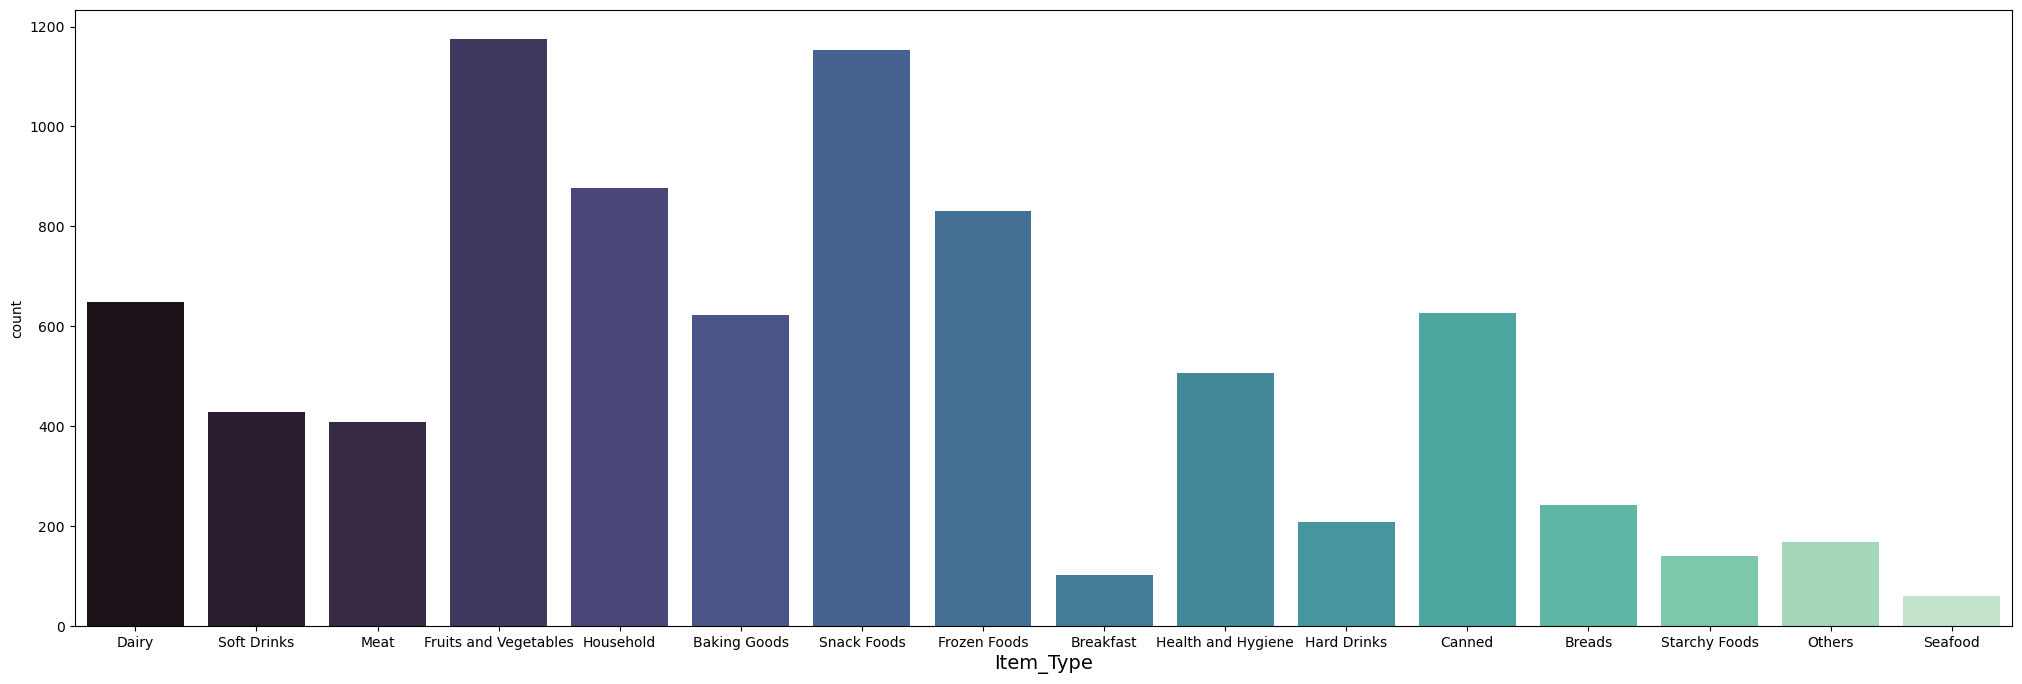

In [24]:
plt.figure(figsize=(25,8))
sns.countplot(x='Item_Type' , data=train_data ,palette='mako')
plt.xlabel('Item_Type', fontsize=14)
plt.show()

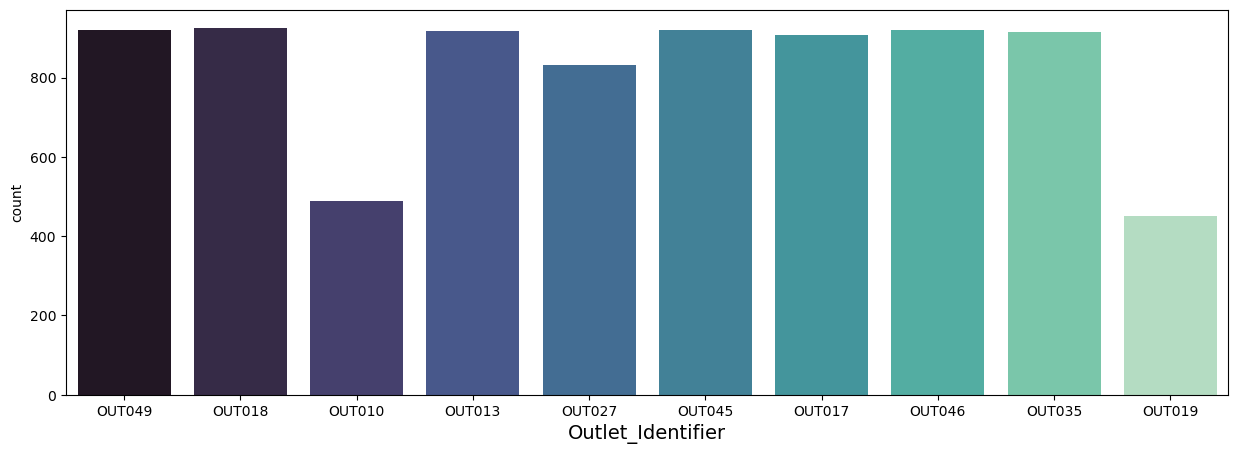

In [25]:
plt.figure(figsize=(15,5))
sns.countplot(x='Outlet_Identifier' , data=train_data ,palette='mako')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.show()

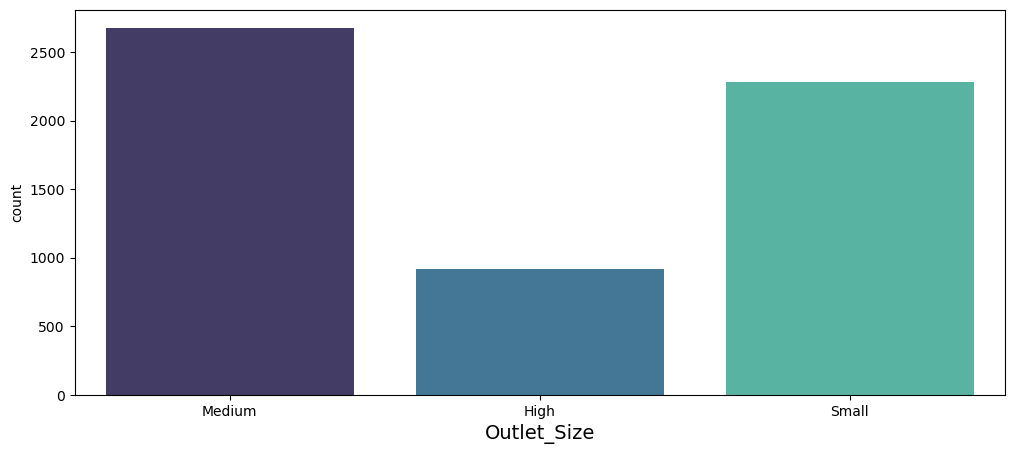

In [26]:
plt.figure(figsize=(12,5))
sns.countplot(x='Outlet_Size' , data=train_data ,palette='mako')
plt.xlabel('Outlet_Size', fontsize=14)
plt.show()

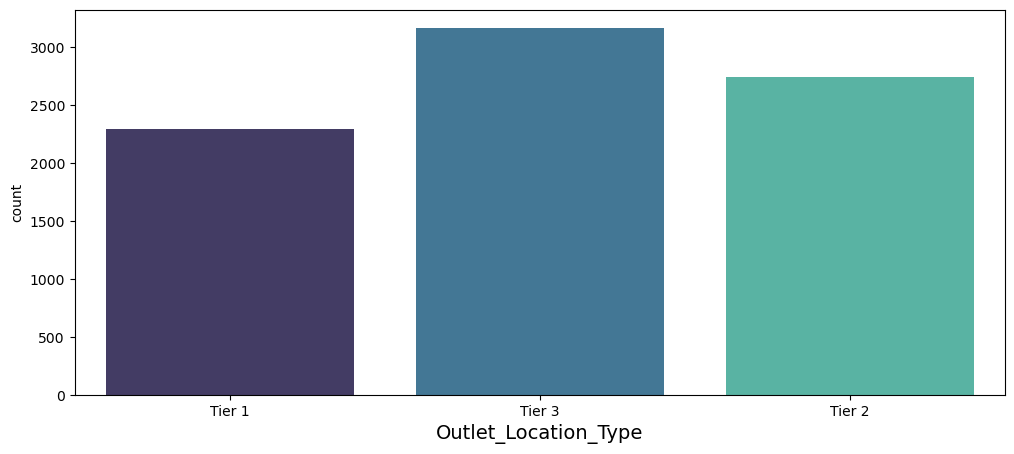

In [27]:
plt.figure(figsize=(12,5))
sns.countplot(x='Outlet_Location_Type' , data=train_data ,palette='mako')
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.show()

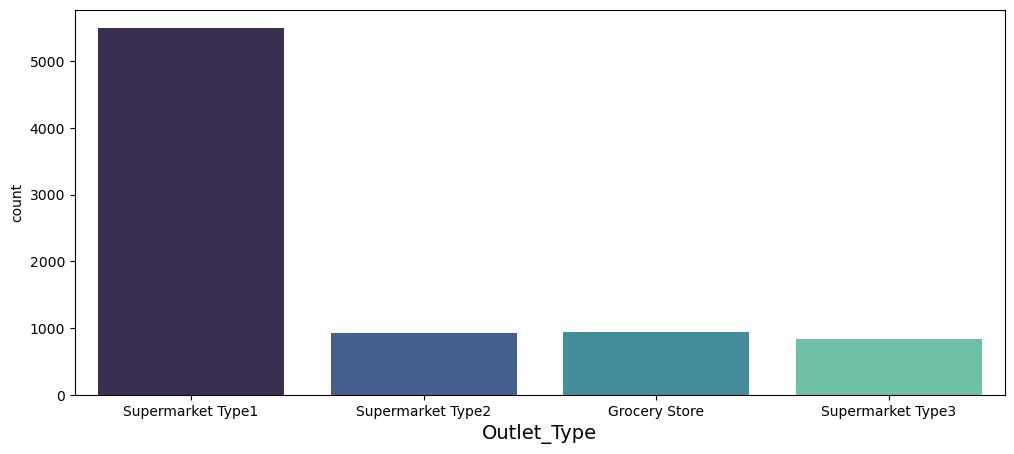

In [28]:
plt.figure(figsize=(12,5))
sns.countplot(x='Outlet_Type' , data=train_data ,palette='mako')
plt.xlabel('Outlet_Type', fontsize=14)
plt.show()

Categorical columns findings:

* Item_Fat_Content - Most of the  items are sold at Low Fat.

* Item_Type -  fruits and vegetables and snack foods, are distinctly popular.

* Outlet_Identifier - The sold items are distributed evenly among most outlets but significantly lower in outlets OUT010 and OUT019.

* Outlet_Size - The size of the stores is most in medium size.

* Outlet_Location_Type -  The most common location type is Tier3.

* Outlet_Type - The mode of outlet type is most in Supermarket Type1


### Bivariate Analysis

<Axes: xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

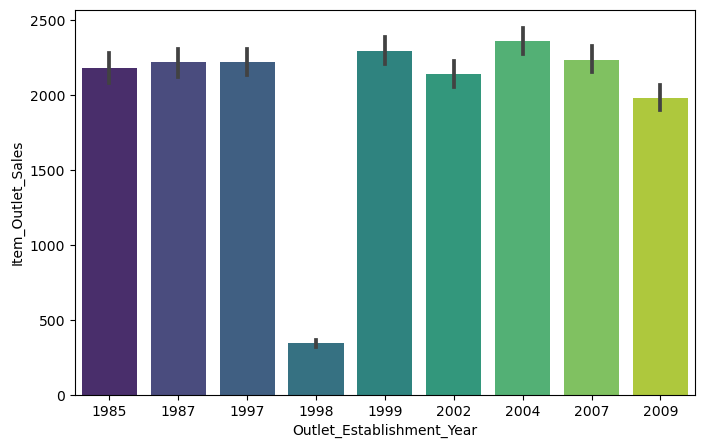

In [29]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=train_data,palette='viridis')

<Axes: xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

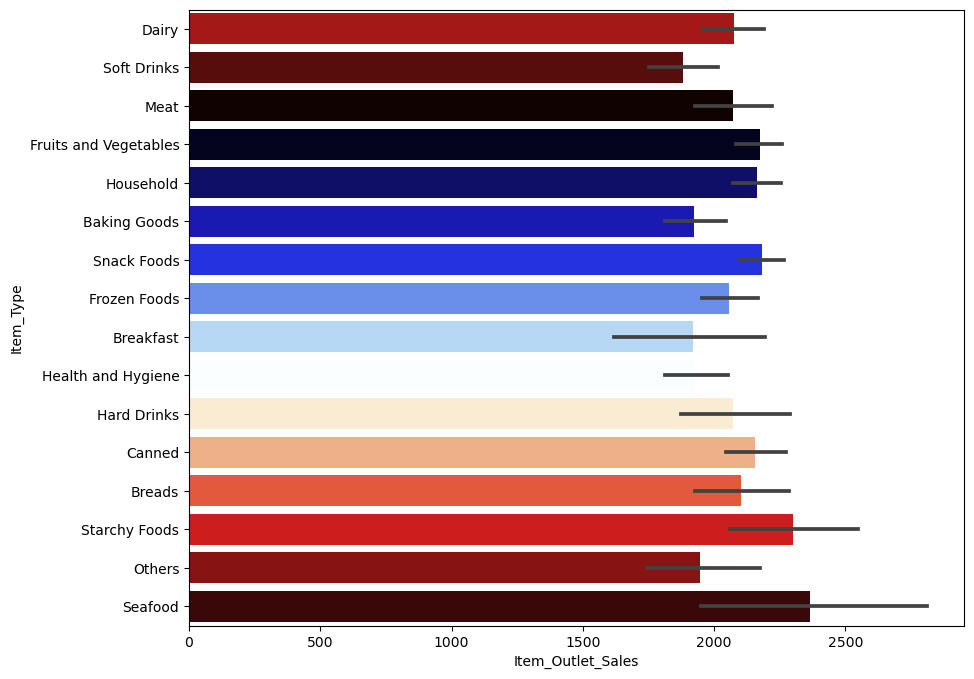

In [30]:
plt.figure(figsize=(10,8))
sns.barplot(y='Item_Type',x='Item_Outlet_Sales',data=train_data,palette='flag')

* The products available were Fruits-Veggies and Snack Foods but the sales of Seafood and Starchy Foods seems higher and hence the sales can be improved with having stock of products that are most bought by customers.

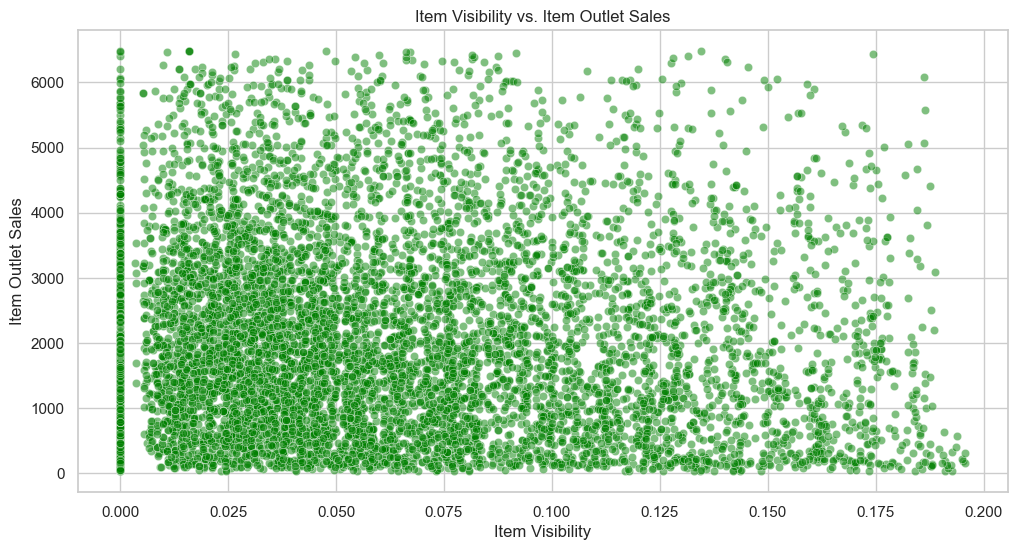

In [31]:
# Explore relationships between variables
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Item_Visibility', y='Item_Outlet_Sales', data=train_data, alpha=0.5, color='green')
plt.title('Item Visibility vs. Item Outlet Sales')
plt.xlabel('Item Visibility')
plt.ylabel('Item Outlet Sales')
plt.show()

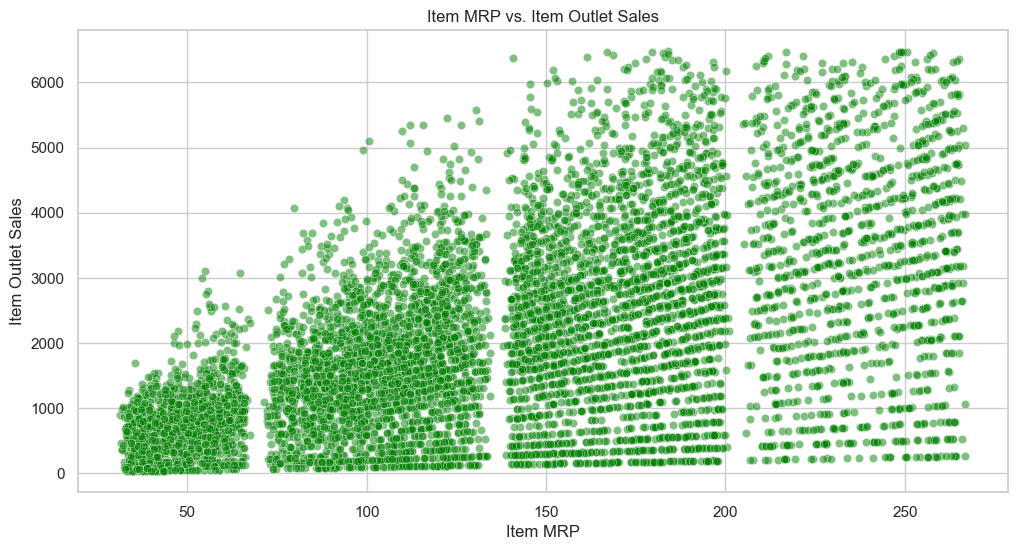

In [32]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=train_data, alpha=0.5, color='green')
plt.title('Item MRP vs. Item Outlet Sales')
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.show()

### Missing Value Treatment

In [33]:
# Checking for null values in Train Data
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1283
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2315
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

* Only Item_Weight and Outlet_Size have missing values.

* Item_Weight is a continuous variable. We can use either mean or median to impute the missing values, but here we will use mean.

* Outlet_Size is a categorical variable so we use mode to impute the missing values in the column.


In [34]:
#impute missing values in Item_Weight using mean
train_data.Item_Weight.fillna(train_data.Item_Weight.mean(), inplace=True)
train_data.Item_Weight.isna().sum()

0

In [35]:
#impute missing values in Outlet_Size using mode
train_data.Outlet_Size.fillna(train_data.Outlet_Size.mode()[0], inplace=True)
train_data.Outlet_Size.isna().sum()

0

In [36]:
train_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [37]:
# Checking for missing values in Test Data
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [38]:
test_data.dropna(axis=1, inplace=True)
test_data.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

### Feature Engineering

In [39]:
# Drop unwanted columns don't have significant values
columns_drop =['Outlet_Establishment_Year','Item_Identifier','Outlet_Identifier']

# Analysing Features columns
Features = ['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Type']

* The columns Item_Fat_Content, Outlet_Size, Outlet_Location_Type will be Label Encoded and 

* The columns Outlet_Type and Item_Type will be One Hot encoded.

In [40]:
for i in columns_drop:
    train_data.drop(i,axis=1,inplace=True)

In [41]:
train_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052


### Encoding Categorical Variables

Encoding categorical variables is a crucial step in preparing data for machine learning models. There are various techniques for encoding categorical variables and the choice depends on the nature of the data and the machine learning algorithm you plan to use. 
Two common encoding methods are:
* label encoding
* one-hot encoding

### Label Encoding

In [42]:
train_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5309
Regular    2884
Name: count, dtype: int64

In [43]:
train_data['Outlet_Size'].value_counts()

Outlet_Size
Medium    4991
Small     2285
High       917
Name: count, dtype: int64

In [44]:
# # Convert categorical data to numerical using
le=LabelEncoder()
Label = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type']

In [45]:
for i in Label:
    train_data[i] = le.fit_transform(train_data[i])
        
train_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,Dairy,249.8092,1,0,Supermarket Type1,3735.1380
1,5.92,1,0.019278,Soft Drinks,48.2692,1,2,Supermarket Type2,443.4228
2,17.50,0,0.016760,Meat,141.6180,1,0,Supermarket Type1,2097.2700
3,19.20,1,0.000000,Fruits and Vegetables,182.0950,1,2,Grocery Store,732.3800
4,8.93,0,0.000000,Household,53.8614,0,2,Supermarket Type1,994.7052


In [46]:
train_data.dtypes

Item_Weight             float64
Item_Fat_Content          int32
Item_Visibility         float64
Item_Type                object
Item_MRP                float64
Outlet_Size               int32
Outlet_Location_Type      int32
Outlet_Type              object
Item_Outlet_Sales       float64
dtype: object

### One Hot Encoding

In [47]:
OHE = OneHotEncoder()

In [48]:
# Analyse one-hot encoding to get three new seperate columns
train_data=pd.get_dummies(train_data,columns=["Item_Type"])

In [49]:
train_data=pd.get_dummies(train_data,columns=["Outlet_Type"])
train_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0,0.016047,249.8092,1,0,3735.1380,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,5.92,1,0.019278,48.2692,1,2,443.4228,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2,17.50,0,0.016760,141.6180,1,0,2097.2700,False,False,False,...,True,False,False,False,False,False,False,True,False,False
3,19.20,1,0.000000,182.0950,1,2,732.3800,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,8.93,0,0.000000,53.8614,0,2,994.7052,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [50]:
# # Select columns with boolean values
boolean_columns = train_data.select_dtypes(include='bool').columns
boolean_columns_only = [col for col in boolean_columns if train_data[col].isin([True, False]).all()]

# # Display columns with only boolean values
print("Columns with only boolean values:")
print(boolean_columns_only)

Columns with only boolean values:
['Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods', 'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3']


In [51]:
# Convert resulting columns to integer data type (0 or 1)
train_data[boolean_columns_only] = train_data[boolean_columns_only].astype(int)
train_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0,0.016047,249.8092,1,0,3735.1380,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,5.92,1,0.019278,48.2692,1,2,443.4228,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,17.50,0,0.016760,141.6180,1,0,2097.2700,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,19.20,1,0.000000,182.0950,1,2,732.3800,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.93,0,0.000000,53.8614,0,2,994.7052,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### PreProcessing Data

In [52]:
train_data['Item_MRP'].astype(int)

0       249
1        48
2       141
3       182
4        53
       ... 
8518    214
8519    108
8520     85
8521    103
8522     75
Name: Item_MRP, Length: 8193, dtype: int32

In [53]:
# Scale or normalize features
scaler = StandardScaler()
columns = ['Item_MRP']
train_data[columns]=scaler.fit_transform(train_data[columns])

train_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0,0.016047,1.799128,1,0,3735.1380,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,5.92,1,0.019278,-1.476205,1,2,443.4228,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,17.50,0,0.016760,0.040856,1,0,2097.2700,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,19.20,1,0.000000,0.698669,1,2,732.3800,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.93,0,0.000000,-1.385323,0,2,994.7052,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Modeling

In [54]:
# Split the data into training and testing sets
X = train_data.drop('Item_Outlet_Sales', axis=1)
y = train_data['Item_Outlet_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
X_train.shape

(6554, 26)

In [56]:
y_train

1766    3125.9310
8196    1186.4556
6669    1670.4922
5132     639.1680
4439     407.4696
          ...    
5437     293.6178
5608    1565.9616
896     1058.6220
7911    2450.1440
7567     395.4852
Name: Item_Outlet_Sales, Length: 6554, dtype: float64

### Linear Regression

In [57]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [58]:
linear_reg_pred = lr.predict(X_test)
linear_reg_pred

array([3893.53431606, 3622.40152454, 2439.9234256 , ..., 1760.01339678,
       3446.85064047, 3644.03192972])

### Regularized Linear Regression

In [59]:
# Lasso
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

Lasso()

In [60]:
lasso_reg_pred = lasso_model.predict(X_test)
lasso_reg_pred

array([3885.38395642, 3612.06874115, 2427.92547646, ..., 1782.93739031,
       3506.86918605, 3646.55939255])

### RandomForest Regressor

In [61]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [62]:
rf_reg_pred = rf_reg.predict(X_test)
rf_reg_pred

array([3991.590844, 3736.4696  , 2655.197084, ..., 1593.432508,
       4031.112732, 3522.534744])

### XGBoost

In [63]:
xgb_reg = XGBRegressor(objective='reg:squarederror', random_state=42)

xgb_reg.fit(X_train, y_train)
xgb_reg_pred = xgb_reg.predict(X_test)
xgb_reg_pred

array([4459.2783, 3715.5715, 3011.0984, ..., 1286.3613, 4122.3228,
       3922.826 ], dtype=float32)

In [64]:
# Hyperparameter tuning for XGBoost
xgb_param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}

xgb_tuned = GridSearchCV(XGBRegressor(objective='reg:squarederror', random_state=42), param_grid=xgb_param_grid, scoring='neg_mean_squared_error', cv=5)
xgb_tuned.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

### Summary

In [65]:
# Evaluate the models
models = [linear_reg_pred, lasso_reg_pred, rf_reg_pred, xgb_reg_pred]
for i, model in enumerate(models):
    mae = MAE(y_test, model)
    mse = MSE(y_test, model)
    r2 = R2(y_test, model)
    
    print(f'Metrics for Model {i+1}:')
    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared Score: {r2}')
    print()


Metrics for Model 1:
Mean Absolute Error: 790.3422550727427
Mean Squared Error: 1066612.275122736
R-squared Score: 0.5424066345275974

Metrics for Model 2:
Mean Absolute Error: 790.630055941757
Mean Squared Error: 1066254.3544889267
R-squared Score: 0.542560188083296

Metrics for Model 3:
Mean Absolute Error: 780.5160197742525
Mean Squared Error: 1136721.7217158494
R-squared Score: 0.5123285842686515

Metrics for Model 4:
Mean Absolute Error: 803.2776607502103
Mean Squared Error: 1187764.9975992355
R-squared Score: 0.4904302197542104



In [66]:
# Save the final model using joblib
joblib.dump(model, 'final_model.joblib')

['final_model.joblib']